In [1]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.7 MB/s eta 0:00:00


In [2]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
dataset_path = "/content/drive/MyDrive/CLW/Datasets"

In [4]:
os.listdir(dataset_path)

['Erica Anonor',
 'Daniel Asante',
 'Micheal Debuo',
 'Araba Turkson',
 'Nana Yaw Bissue',
 'Ebela Arthur',
 'Kabutey Manasseh']

In [5]:
img = cv.imread("/content/drive/MyDrive/CLW/Datasets/Araba Turkson/WhatsApp Image 2025-03-04 at 5.43.25 PM (1).jpeg")

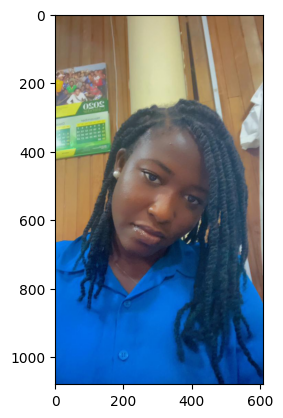

In [6]:
# opencv BGR channel format and plt reads images as RGB channel format

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB

In [7]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

In [8]:
results

[{'box': [152, 329, 295, 389],
  'confidence': 0.9995825886726379,
  'keypoints': {'nose': [318, 588],
   'mouth_right': [317, 653],
   'right_eye': [395, 530],
   'left_eye': [280, 475],
   'mouth_left': [218, 608]}},
 {'box': [58, 219, 13, 16],
  'confidence': 0.9566723704338074,
  'keypoints': {'nose': [67, 230],
   'mouth_right': [67, 232],
   'right_eye': [69, 226],
   'left_eye': [64, 225],
   'mouth_left': [63, 232]}}]

In [9]:
x,y,w,h = results[0]['box']

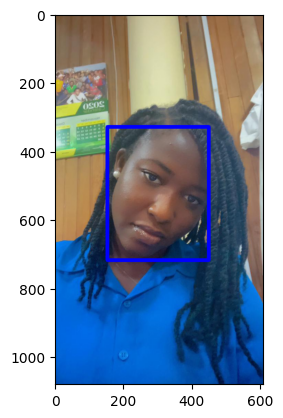

In [10]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 10)
plt.imshow(img)

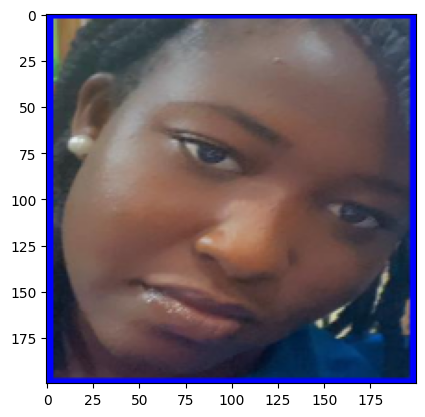

In [11]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160
my_face = cv.resize(my_face, (200,200))
plt.imshow(my_face)

In [12]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (200,200)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [13]:
faceloading = FACELOADING(dataset_path)
X, Y = faceloading.load_classes()

Loaded successfully: 4
Loaded successfully: 6
Loaded successfully: 4
Loaded successfully: 4
Loaded successfully: 5
Loaded successfully: 9
Loaded successfully: 2


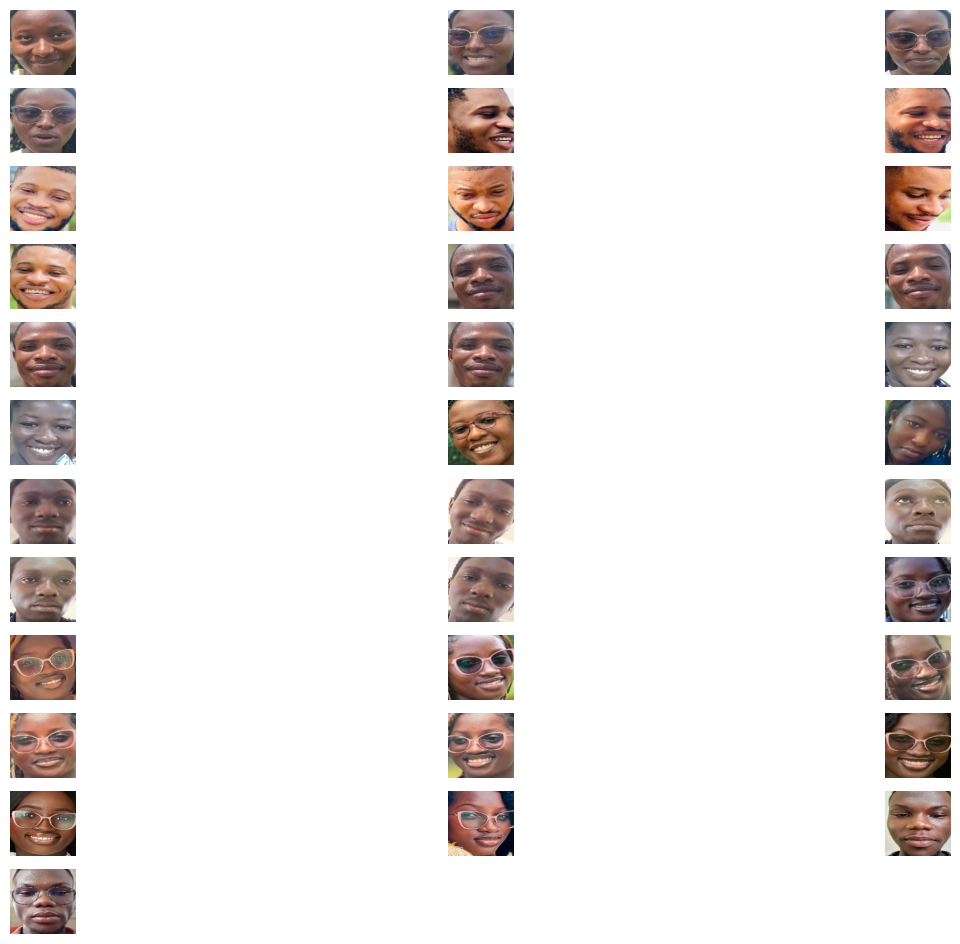

In [14]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

In [15]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=0d6c5625cb227d7cd68670723f80512f83fe546624ffaebb7c16e437182bb2f7
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras-facenet


In [16]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_pixels):
    face_pixels = face_pixels.astype('float32')
    face_pixels = np.expand_dims(face_pixels, axis=0)
    yhat = embedder.embeddings(face_pixels)
    return yhat[0]

In [17]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

In [18]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

In [19]:
Y

array(['Erica Anonor', 'Erica Anonor', 'Erica Anonor', 'Erica Anonor',
       'Daniel Asante', 'Daniel Asante', 'Daniel Asante', 'Daniel Asante',
       'Daniel Asante', 'Daniel Asante', 'Micheal Debuo', 'Micheal Debuo',
       'Micheal Debuo', 'Micheal Debuo', 'Araba Turkson', 'Araba Turkson',
       'Araba Turkson', 'Araba Turkson', 'Nana Yaw Bissue',
       'Nana Yaw Bissue', 'Nana Yaw Bissue', 'Nana Yaw Bissue',
       'Nana Yaw Bissue', 'Ebela Arthur', 'Ebela Arthur', 'Ebela Arthur',
       'Ebela Arthur', 'Ebela Arthur', 'Ebela Arthur', 'Ebela Arthur',
       'Ebela Arthur', 'Ebela Arthur', 'Kabutey Manasseh',
       'Kabutey Manasseh'], dtype='<U16')

In [20]:
EMBEDDED_X

array([[-0.02232899, -0.0458368 , -0.02216107, ...,  0.03134979,
         0.03635303,  0.01664337],
       [-0.04188269, -0.07941705, -0.05060443, ...,  0.03922526,
         0.04259707, -0.00683477],
       [-0.03320102, -0.07035614, -0.06880181, ...,  0.0438015 ,
         0.05926967,  0.01008131],
       ...,
       [-0.03253702, -0.03746785, -0.08738235, ...,  0.01260226,
         0.05184215, -0.0560807 ],
       [ 0.05510955, -0.03070395, -0.02259986, ..., -0.07979508,
         0.11085539, -0.03804885],
       [ 0.05127248, -0.02329974,  0.00080015, ..., -0.05731219,
         0.05998078, -0.04426267]], dtype=float32)

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your saved embeddings
data = np.load('faces_embeddings_done_4classes.npz')
EMBEDDED_X, Y = data['arr_0'], data['arr_1']

# Encode the labels
encoder = LabelEncoder()
encoder.fit(Y)
Y_encoded = encoder.transform(Y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(EMBEDDED_X, Y_encoded, test_size=0.2, random_state=42)

# Train a classifier
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [22]:
# Test the classifier
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Save the model and encoder
import pickle
with open('face_recognition_model.pkl', 'wb') as file:
    pickle.dump((model, encoder), file)

Accuracy: 100.00%


In [24]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [25]:
def verify_face(image_path, model, encoder, detector, embedder, threshold=0.7):
    # Read image
    img = cv.imread(image_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Detect face
    try:
        results = detector.detect_faces(img)
        if not results:
            return "No face detected"

        x, y, w, h = results[0]['box']
        x, y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face = cv.resize(face, (200, 200))

        # Get embedding
        face_embedding = get_embedding(face)

        # Predict
        samples = np.expand_dims(face_embedding, axis=0)
        yhat_class = model.predict(samples)
        yhat_prob = model.predict_proba(samples)

        # Get name
        class_index = yhat_class[0]
        class_probability = yhat_prob[0, class_index] * 100
        predict_name = encoder.inverse_transform([class_index])[0]

        if class_probability < threshold * 100:
            return "Unknown"

        return predict_name, class_probability

    except Exception as e:
        return f"Error: {str(e)}"

In [26]:
Y_encoded

array([3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 0, 0, 0, 0, 6, 6, 6, 6,
       6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4])